<div style="color:#485053;
           display:fill;
           border-radius:0px;
           background-color:#86C2DE;
           font-size:200%;
           padding-left:40px; 
           font-family:Verdana;
           font-weight:600; 
           letter-spacing:0.5px;
           ">

<p style="padding: 15px;
          color:white;
          text-align: center;">

 Activity 3-Image Classifier
</p>
</div> 

**About the data:**
* This dataset here contains two classes majorly being defective and non-defective PCB. This dataset can be used to realize the defective PCB of the same PCB type. An image classier to detect the defected PCB to be implemented. This dataset will help to detect defects that may escape the human eye.
* The defects were manually made on PCBs for the sake of collecting enough required data.

<div style="color:#485053;
           display:fill;
           border-radius:0px;
           background-color:#C2C4E2;
           font-size:200%;
           padding-left:40px; 
           font-family:Verdana;
           font-weight:600; 
           letter-spacing:0.5px;
           ">

<p style="padding: 15px;
          color:white;
          text-align: center;">

 LIBRARIES
</p>
</div> 

Here are the list of necessary libraries which we will use to classify PCB into two classes, defected PCB and non-defect PCB.

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
import seaborn as sns
import pandas as pd

<div style="color:#485053;
           display:fill;
           border-radius:0px;
           background-color:#C2C4E2;
           font-size:200%;
           padding-left:40px; 
           font-family:Verdana;
           font-weight:600; 
           letter-spacing:0.5px;
           ">

<p style="padding: 15px;
          color:white;
          text-align: center;">

 LOADING IMAGE DATA
</p>
</div>

In [2]:
dir='../input/pcbexperiment/dataset/tobeaugmented'
categories =['defected','non-defect']  #As there are two folders in the dataset
data=[]

for i in categories:
    path=os.path.join(dir,i)
    label=categories.index(i)
    print(path)
    
    for img in os.listdir(path):
        imgpath=os.path.join(path,img)
        pcb_img=cv2.imread(imgpath,0)
        pcb_img=cv2.resize(pcb_img,(50,50))
        image=np.array(pcb_img).flatten()
        data.append([image,label])
        
#0=defected, 1=non-defect        

../input/pcbexperiment/dataset/tobeaugmented/defected
../input/pcbexperiment/dataset/tobeaugmented/non-defect


In [3]:
random.shuffle(data)
features=[]
labels=[]

for f,l in data:
    features.append(f)
    labels.append(l)

<div style="color:#485053;
           display:fill;
           border-radius:0px;
           background-color:#C2C4E2;
           font-size:200%;
           padding-left:40px; 
           font-family:Verdana;
           font-weight:600; 
           letter-spacing:0.5px;
           ">

<p style="padding: 15px;
          color:white;
          text-align: center;">

DATA VISUALISATION
</p>
</div>

In [4]:
df=pd.DataFrame(data)
defected_dc=len(df[df[1]==0])
nc=len(df[df[1]==1])

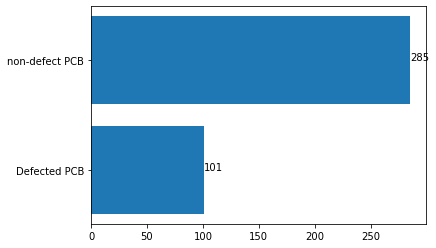

In [5]:
x = ["Defected PCB","non-defect PCB"]
y = [defected_dc,nc]
plt.barh(x, y)
for index, value in enumerate(y):
    plt.text(value, index, str(value))

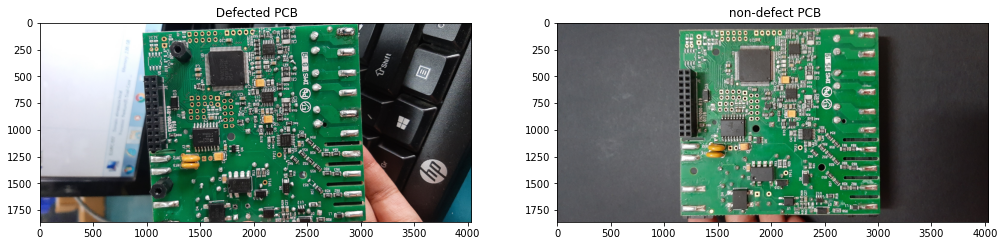

In [6]:
import matplotlib.image as mpimg
img = mpimg.imread('../input/pcbexperiment/dataset/tobeaugmented/defected/20200707_092157.jpg')
img1=mpimg.imread('../input/pcbexperiment/dataset/tobeaugmented/non-defect/20200630_114900.jpg')
plt.figure(figsize=(17, 17))
plt.subplot(1, 2, 1)
imgplot = plt.imshow(img)
plt.title(" Defected PCB")

plt.subplot(1, 2, 2)
imgplot = plt.imshow(img1)
plt.title(" non-defect PCB")
plt.show()

<div style="color:#485053;
           display:fill;
           border-radius:0px;
           background-color:#C2C4E2;
           font-size:200%;
           padding-left:40px; 
           font-family:Verdana;
           font-weight:600; 
           letter-spacing:0.5px;
           ">

<p style="padding: 15px;
          color:white;
          text-align: center;">

SPLIT DATA
</p>
</div>

* We will keep the test size of data 0.25 

In [7]:

xtrain,xtest,ytrain,ytest=train_test_split(features,labels,test_size=0.25)


# Model Building with SVM(SUPPORT VECTOR MACHINE)

In [8]:
model=SVC(C=1,kernel='poly',gamma='auto')
model.fit(xtrain,ytrain)
y_pred=model.predict(xtest)
accuracy=model.score(xtest,ytest)
print('Accuracy :','%.2f'%accuracy)

Accuracy : 0.96


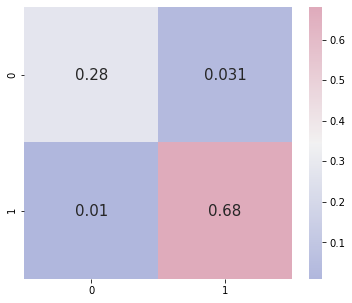

In [9]:
# confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(6,5))
cf_matrix = confusion_matrix(ytest, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})
CM=cf_matrix

In [10]:
#calculate specificity,sensitivity, precision and recall
SENSITIVITY = CM[1, 1] / (CM[1, 1] + CM[1, 0])
specificity1 = CM[0, 0] / (CM[0, 0] + CM[0, 1])
PRECISION = CM[1, 1] / (CM[1, 1] + CM[0, 1])
recall = CM[1, 1] / (CM[1, 1] + CM[1, 0])
print("Sensitivity :",SENSITIVITY)
print("Specificity :",'%.2f'%specificity1)
print("Precision :",'%.2f'%PRECISION)
print("Recall :",recall)

Sensitivity : 0.9850746268656716
Specificity : 0.90
Precision : 0.96
Recall : 0.9850746268656716


In [11]:
y_pred_gnb=model.predict(xtest)
f1 = f1_score(ytest, y_pred_gnb, zero_division=1)
print("F1-Score :", '%.2f'%(f1*100),"%")    

F1-Score : 97.06 %
